In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import socket as socket
import os as os
import sys as sys
import multiprocessing as mp

### For Arial Font
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'   # Set the defaul
### Make sure to have the font installed (it is on cluster for Harald)
rcParams['font.sans-serif'] = ['Arial']

socket_name = socket.gethostname()
print(socket_name)

if socket_name.startswith("compute-"):
    print("HSM O2 Computational partition detected.")
    path = "/n/groups/reich/hringbauer/git/hapBLOCK/"  # The Path on Harvard Cluster
else: 
    raise RuntimeWarning("Not compatible machine. Check!!")

os.chdir(path)  # Set the right Path (in line with Atom default)

print(os.getcwd())
print(f"CPU Count: {mp.cpu_count()}")

compute-e-16-230.o2.rc.hms.harvard.edu
HSM O2 Computational partition detected.
/n/groups/reich/hringbauer/git/hapBLOCK
CPU Count: 28


In [14]:
def load_ibd(out_folder = "/n/groups/reich/hringbauer/git/hapBLOCK/output/pedsim/",
             file="av2.tsv", skip_rows=False):
    df = pd.read_csv(out_folder + file, sep="\t")
    if skip_rows:
        df = df[::2]
    return df

In [82]:
files_gp = ["gp1.tsv", "gp2.tsv", "gp3.tsv"]
files_av = ["av1.tsv", "av2.tsv", "av3.tsv", "av4.tsv", "av5.tsv"]
files_sibs = ["sib.tsv", "hsib.tsv"]
out_folder = "/n/groups/reich/hringbauer/git/hapBLOCK/output/pedsim/"

df_gps = [load_ibd(file=f, out_folder=out_folder,
                   skip_rows=True) for f in files_gp]

df_avs = [load_ibd(file=f, out_folder=out_folder) for f in files_av]
df_sibs = load_ibd(file=files_sibs[0], out_folder=out_folder)
df_hsibs = load_ibd(file=files_sibs[1], out_folder=out_folder)

df_par = load_ibd(file="parent.tsv", out_folder=out_folder)[1:2]

# Do the Plot

In [3]:
def plot_scatter_ibd(ax =0, df_ibds=[], min_cm=12, s=40,
                     c="deepskyblue", m="o", label="",
                     xlim=[-5,3600], ylim=[0,55], savepath="", show=False):
    """Plot Scatter Plot of IBD"""
    if ax==0:
        plt.figure(figsize=(8,8))
        
    ax = plt.gca()
    ax.scatter(df_ibds[f"sum_IBD>{min_cm}"], df_ibds[f"n_IBD>{min_cm}"], s=s,
               ec="k", linewidth=0.5, color=c, marker=m, label=label)

    ax.set_xlabel(f"Sum IBD >{min_cm}cM [cM]", fontsize=14)
    ax.set_ylabel(f"n IBD >{min_cm}cM [cM]", fontsize=14)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
    if len(savepath)>0:
        plt.savefig(savepath, bbox_inches ='tight', pad_inches = 0, dpi=400)
        print(f"Saved to {savepath}")
    if show:
        plt.show()

In [4]:
df_ibds = pd.read_csv("/n/groups/reich/hringbauer/git/ibd_euro/output/ibd/ibd220.all.v1.tsv", 
                      sep="\t") # compression='gzip'

len(df_ibds)

146117

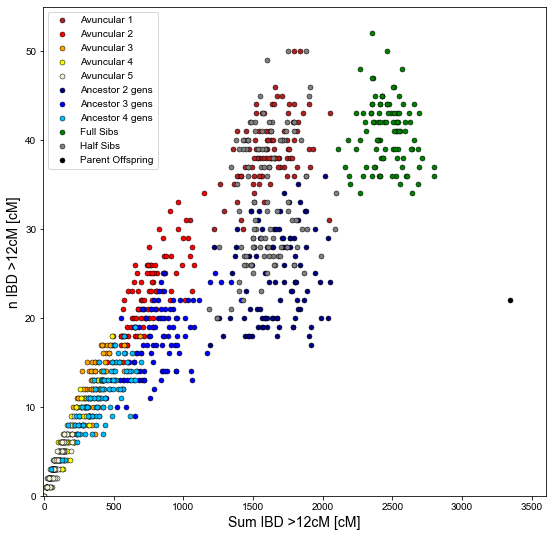

In [94]:
plt.figure(figsize=(9,9))

ax = plt.gca()

plot_scatter_ibd(ax=ax, df_ibds=df_avs[0], show=False, label="Avuncular 1", 
                 c="firebrick", s=25)
plot_scatter_ibd(ax=ax, df_ibds=df_avs[1], show=False, label="Avuncular 2", 
                 c="red", s=25)
plot_scatter_ibd(ax=ax, df_ibds=df_avs[2], show=False, label="Avuncular 3", 
                 c="orange", s=25)
plot_scatter_ibd(ax=ax, df_ibds=df_avs[3], show=False, label="Avuncular 4", 
                 c="yellow", s=25)
plot_scatter_ibd(ax=ax, df_ibds=df_avs[4], show=False, label="Avuncular 5", 
                 c="beige", s=25)

plot_scatter_ibd(ax=ax, df_ibds=df_gps[0], show=False, label="Ancestor 2 gens", 
                 c="navy", s=25)
plot_scatter_ibd(ax=ax, df_ibds=df_gps[1], show=False, label="Ancestor 3 gens", 
                 c="blue", s=25)
plot_scatter_ibd(ax=ax, df_ibds=df_gps[2], show=False, label="Ancestor 4 gens", 
                 c="deepskyblue", s=25)

plot_scatter_ibd(ax=ax, df_ibds=df_sibs, show=False, label="Full Sibs", 
                 c="green", s=25)
plot_scatter_ibd(ax=ax, df_ibds=df_hsibs, show=False, label="Half Sibs", 
                 c="gray", s=25)
plot_scatter_ibd(ax=ax, df_ibds=df_par, show=False, label="Parent Offspring", 
                 c="black", s=25)


#plot_scatter_ibd(ax=ax, df_ibds=df_ibds, show=False, label="V43.all data", s=30)

ax.legend(loc="upper left")
plt.savefig("./figs/pedsim/simulated_pedsim.png", bbox_inches ='tight', pad_inches = 0, dpi=400)
plt.show()

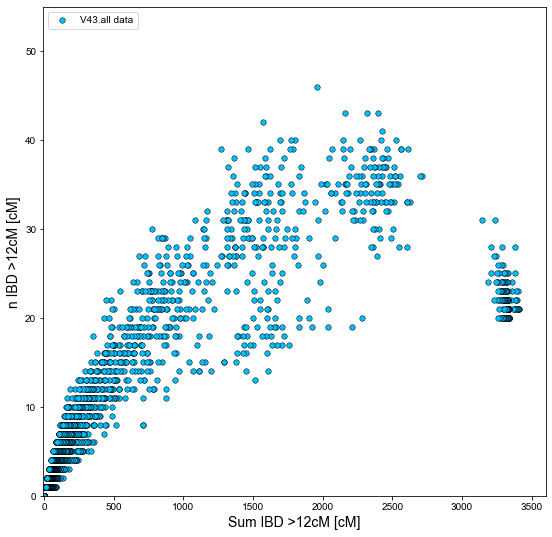

In [93]:
plt.figure(figsize=(9,9))

ax = plt.gca()
plot_scatter_ibd(ax=ax, df_ibds=df_ibds, show=False, label="V43.all data", s=30)
ax.legend(loc="upper left")

plt.savefig("./figs/pedsim/v43.all.png", bbox_inches ='tight', pad_inches = 0, dpi=400)

plt.show()

# Plot Sub Dataframe

In [9]:
sys.path.insert(0,"/n/groups/reich/hringbauer/git/hapBLOCK/python3/")  # hack to get development package first in path
from ibd_stats.funcs import new_columns, find_relatives, give_sub_df

In [10]:
df_meta = pd.read_csv("/n/groups/reich/hringbauer/git/ibd_euro/data/iid_lists/ibd_meta_dr_all.v1.tsv", sep="\t")
df_meta["iid"] = df_meta["Version ID"]
new_columns(df_ibds, df_meta, col = ["Mean date", "Group name", "Publication"]) #"clst"

,iid1,iid2,max_IBD,sum_IBD>8,n_IBD>8,sum_IBD>12,n_IBD>12,sum_IBD>16,n_IBD>16,sum_IBD>20,n_IBD>20,Mean date1,Mean date2,Group name1,Group name2,Publication1,Publication2
0,I12239,I1421,283.610903,3410.180296,21.0,3410.180296,21.0,3410.180296,21.0,3410.180296,21.0,4300,NaN,Russia_MBA_Poltavka,NaN,Unpublished,NaN
1,MIB022,MIB048,283.652203,3406.985897,21.0,3406.985897,21.0,3406.985897,21.0,3406.985897,21.0,3894,3815,Czechia_Bohemia_Unetice_EBA,Czechia_Bohemia_Unetice_EBA,Unpublished,Unpublished
2,I1462,I12240,283.610903,3404.541097,21.0,3404.541097,21.0,3404.541097,21.0,3404.541097,21.0,NaN,4300,NaN,Russia_MBA_Poltavka,NaN,Unpublished
3,I10320,I10239,284.001003,3401.582106,23.0,3401.582106,23.0,3401.582106,23.0,3383.833706,22.0,4050,4050,Slovakia_EBA_Unetice,Slovakia_EBA_Unetice_daughter.I7898.daughter.I...,Unpublished,Unpublished
4,I8068,I8034,283.652203,3399.602912,21.0,3399.602912,21.0,3399.602912,21.0,3399.602912,21.0,6051,6096,France_Megalithic_MN_father.or.son.I8034,France_Megalithic_MN,Unpublished,Unpublished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146112,MIB060,I15643,8.000088,8.000088,1.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,3894,4100,Czechia_Bohemia_Unetice_EBA,Czech_EBA_Unetice,Unpublished,Unpublished
146113,RISE1241.SG,I7789,8.000016,8.000016,1.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,4753,2950,Poland_Sandomierz_GAC.SG,Russia_VolsovoDanilovo_BA_IA,SchroederPNAS2019,Unpublished
146114,MIB063,I11502,8.000004,8.000004,1.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,3810,2850,Czechia_Bohemia_Unetice_EBA,Kazakhstan_UnknownPeriod_N_C_BA_Srubnaya_possible,Unpublished,Unpublished
146115,I3393,I6051,8.000004,8.000004,1.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,3600,3920,Russia_MLBA_Krasnoyarsk_father.or.son.I6718,Russia_BA_Chernoozersky,NarasimhanPattersonScience2019,Unpublished


In [17]:
dft = give_sub_df(df_ibds, pop1="Argar", 
                  pop2="", col="Group name").sort_values(by="max_IBD", ascending=False)
dft2 = dft[dft["sum_IBD>16"]>50]
len(dft2)

Found: 2600



20

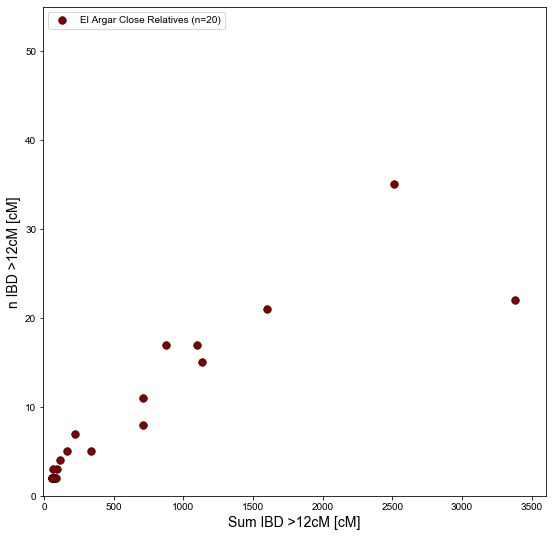

In [23]:
plt.figure(figsize=(9,9))

ax = plt.gca()
plot_scatter_ibd(ax=ax, df_ibds=dft2, show=False, label="El Argar Close Relatives (n=20)", s=60,
                c="maroon")
ax.legend(loc="upper left")

plt.savefig("./figs/pedsim/el_argar.png", bbox_inches ='tight', pad_inches = 0, dpi=400)

plt.show()